In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

dataset = "iris_data.csv"

df = pd.read_csv(dataset,delimiter=',')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df[['sepal_length','petal_width']].values # Feature set
Y = df['species'].values # Class labels

le = preprocessing.LabelEncoder()
le.fit(np.unique(Y))
Y = le.transform(Y)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,stratify=Y)

(60, 2)


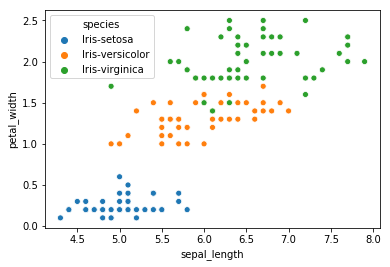

In [21]:
ax = sns.scatterplot(x="sepal_length", y="petal_width",hue="species", data=df)

In [27]:
class KNNClassifier():
    def __init__(self):
        pass
    def train(self,X,Y):
        self.X = X
        self.Y = Y
    def predict(self,x,k,method='euclid'):
        predictions = []
        for test_input in x:
            if(method == 'euclid'):
                distances = self.euclid_distance(test_input,self.X)
            elif(method == 'manhattan'):
                distances = self.manhattan_distance(test_input,self.X)
            else:
                distances = self.cosine_distance(test_input,self.X)

            min_k_distance_indices = np.argsort(distances)[:k] # K minimum distance indices
            nearest_classes = list(self.Y[min_k_distance_indices]) # Classes of minimum k distances
            classes, occurence = np.unique(nearest_classes, return_counts=True)
            predictions.append(classes[occurence.argmax()])
        return predictions
    
    def euclid_distance(self,x1,x2):
        return np.sqrt(np.sum(np.power(x1-x2, 2),axis=1))
    def manhattan_distance(self,x1,x2):
        return np.sum(np.absolute(x1-x2),axis=1)
    def cosine_distance(self,x1,x2):
        return -1 * np.dot(x2,x1) / (np.linalg.norm(x1) * np.linalg.norm(x2,axis=1)) # In cosine similarity, maximum value means most similar so multiply with -1.


In [32]:
clf = KNNClassifier()
clf.train(x_train,y_train)

distance_methods = ['euclid','manhattan','cosine']
test_size = len(x_test)

observations = pd.DataFrame(columns=['k','accuracy','error_count','method']) 

for method in distance_methods:
    for k in range(1,16):
        success = 0
        y_pred = np.array(clf.predict(x_test,k,method=method))
        success = np.count_nonzero(np.equal(y_pred,y_test))
        accuracy = success / test_size * 100
        error_count = test_size - success
        observations.loc[len(observations)] = [k,accuracy,error_count,method]

In [33]:
observations

,k,accuracy,error_count,method
0,1,90.000000,6,euclid
1,2,95.000000,3,euclid
2,3,96.666667,2,euclid
3,4,96.666667,2,euclid
4,5,95.000000,3,euclid
5,6,95.000000,3,euclid
6,7,96.666667,2,euclid
7,8,96.666667,2,euclid
8,9,96.666667,2,euclid
9,10,95.000000,3,euclid


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6,p=1)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [23]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNNClassifier()
clf.train(x_train,y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()],7)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')")

plt.show()

ValueError: operands could not be broadcast together with shapes (61600,2) (90,2) 

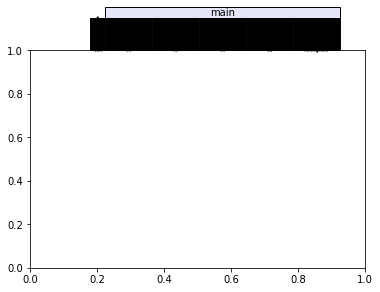

In [35]:

plt.table(cellText=df.round(4).values, cellLoc='center', bbox=[0.225, 1, 0.7, 0.15],
    rowLabels=['  {}  '.format(i) for i in df.index], rowLoc='center',
    rowColours=['silver']*len(df.index), colLabels=df.columns, colLoc='center',
    colColours=['lightgrey']*len(df.columns), colWidths=[0.1]*len(df.columns))
plt.table(cellText=[['main']], cellLoc='center', bbox=[0.225, 1.15, 0.7, 0.05],
    cellColours=[['Lavender']])
